In [1]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import EoN
from tqdm import trange
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [2]:
def SEIR_network(G, tau, alpha, gamma, rho, tmax):
    # Initialize states: S=0 (Susceptible), E=1 (Exposed), I=2 (Infected), R=3 (Recovered)
    for node in G.nodes():
        G.nodes[node]['state'] = 0  # Start all nodes as susceptible

    initial_infected = int(rho*len(G.nodes()))
    initial_infected_nodes = random.sample(list(G.nodes()), initial_infected)
    for node in initial_infected_nodes:
        G.nodes[node]['state'] = 2

    susceptible_count = []
    exposed_count = []
    infected_count = []
    recovered_count = []

    for day in range(tmax + 1):
        new_states = {}

        # Count current states
        susceptible = sum(1 for n in G.nodes if G.nodes[n]['state'] == 0)
        exposed = sum(1 for n in G.nodes if G.nodes[n]['state'] == 1)
        infected = sum(1 for n in G.nodes if G.nodes[n]['state'] == 2)
        recovered = sum(1 for n in G.nodes if G.nodes[n]['state'] == 3)

        susceptible_count.append(susceptible)
        exposed_count.append(exposed)
        infected_count.append(infected)
        recovered_count.append(recovered)

        for node in G.nodes():
            if G.nodes[node]['state'] == 2:
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['state'] == 0:
                        if random.random() < tau:
                            new_states[neighbor] = 1
                if random.random() < gamma:
                    new_states[node] = 3

            elif G.nodes[node]['state'] == 1:
                if random.random() < alpha:
                    new_states[node] = 2

        for node, new_state in new_states.items():
            G.nodes[node]['state'] = new_state

    return [index for index in range(tmax + 1)], susceptible_count, exposed_count, infected_count, recovered_count


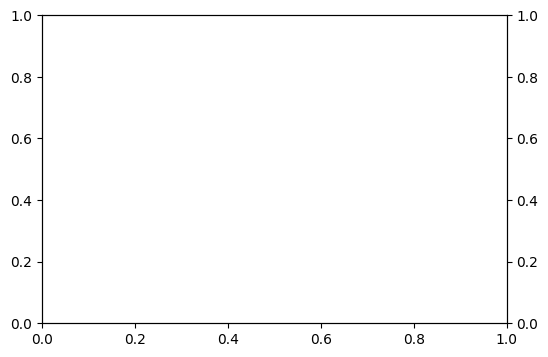

In [49]:
# parameters for the network

N = 10**4

#G=nx.barabasi_albert_graph(N, 5)
G = nx.watts_strogatz_graph(N, 8, 0.1)
#G = nx.complete_graph(N)

tmax = 250
iterations = 2  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:

        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax_beta = ax.twinx()
        for iter in range(0, iterations):
            # SEIR
            if seed > 1400:
                t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)

                S = np.array(S)
                E = np.array(E)
                I = np.array(I)
                R = np.array(R)

                ax.plot(t, I, color = 'k', alpha=0.3)

                # compute betas values
                beta_values = []
                num_days = len(t)
                for i in range(num_days - 1):
                    if S[i] > 0 and I[i] > 0:
                        beta = - (S[i + 1] - S[i]) / (S[i] * I[i])
                    else:
                        beta = np.nan
                    beta_values.append(beta)
                beta_values.append(np.nan)
                ax_beta.plot(beta_values, color='lightgray', alpha=0.5)
                # store the simulation results in a dataFrame
                df_sim = pd.DataFrame({
                "S": S,
                "E": E,
                "I": I,
                "R": R,
                "Beta": beta_values
                })
                # save the results to a csv file
                #output_file = f"seir_seed_{seed}.csv"
                #df_sim.to_csv(f'initial_data/{output_file}', index=False)
                print(seed)
            seed += 1       


In [50]:
t

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Text(0, 0.5, 'Number of nodes')

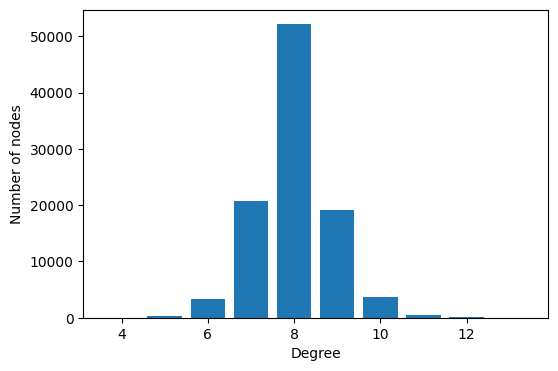

In [38]:
# parameters for the network

N = 10**5

#G=nx.barabasi_albert_graph(N, 5)
G = nx.watts_strogatz_graph(N, 8, 0.1)
#G = nx.complete_graph(N)

tmax = 250
iterations = 1  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:
        t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)

        
plt.subplots(1,1,figsize=(6,4))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

(0.0, 30.0)

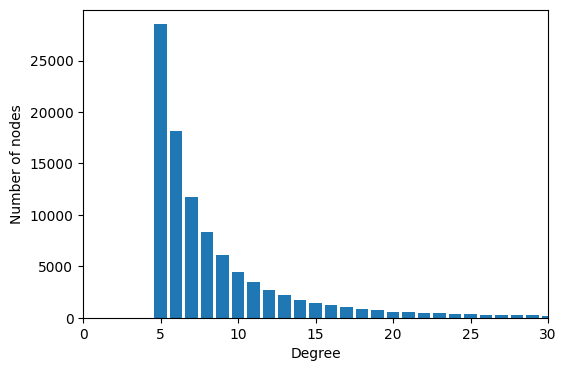

In [30]:
# parameters for the network

N = 10**5

G=nx.barabasi_albert_graph(N, 5)
#G = nx.watts_strogatz_graph(N, 8, 0.1)
#G = nx.complete_graph(N)

tmax = 250
iterations = 1  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:
        t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)
        

plt.subplots(1,1,figsize=(6,4))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.xlim(0,30)

Text(0, 0.5, 'Number of nodes')

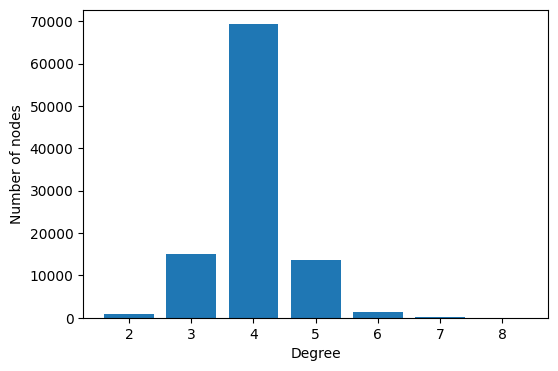

In [40]:
# parameters for the network

N = 10**5

#G=nx.barabasi_albert_graph(N, 5)
G = nx.watts_strogatz_graph(N, 5, 0.1)
#G = nx.complete_graph(N)

tmax = 250
iterations = 1  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:
        t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)
        
        
plt.subplots(1,1,figsize=(6,4))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

Generate csv-file with value of parameters for every seeds

In [6]:
seed_number = 0

iterations = 50  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

parameters = pd.DataFrame(columns = ['seed_number','tau', 'rho'])
for tau in tau_boundaries:
    for rho in rho_boundaries:
        for iter in range(0, iterations):
            parameters = pd.concat([parameters,
                                    pd.DataFrame({'seed_number':[seed_number],
                                                  'tau':[tau],'rho':[rho]})
                                   ],ignore_index=True)
            seed_number += 1 

# save the results to a csv file
parameters.to_csv('initial_data/seeds_parameters.csv', index=False)
print('END')


C:\Users\user\AppData\Local\Temp\ipykernel_11904\2225653252.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameters = pd.concat([parameters,


END


Train-val-test split seeds numbers

In [10]:
df = pd.read_csv('initial_data/seeds_parameters.csv')
X = df.drop(columns=['tau', 'rho'])
y = df[['tau', 'rho']]
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=y)
y = y.loc[X_train.index]
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42, stratify=y)
X_train = X_train.sort_values(by = ['seed_number'])
X_val = X_val.sort_values(by = ['seed_number'])
X_test = X_test.sort_values(by = ['seed_number'])

In [10]:
df = pd.read_csv('initial_data/seeds_parameters.csv')
X = df.drop(columns=['tau', 'rho'])
y = df[['tau', 'rho']]
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=y)
y = y.loc[X_train.index]
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42, stratify=y)
X_train = X_train.sort_values(by = ['seed_number'])
X_val = X_val.sort_values(by = ['seed_number'])
X_test = X_test.sort_values(by = ['seed_number'])

Sharing the seeds on train and test and generate csv-file with value of initial and finite indexies

In [11]:
train_index = pd.DataFrame(columns = ['initial','finite'])
for i, seed_number in enumerate(X_train['seed_number'].values):
    df = pd.read_csv(f'initial_data/seir_seed_{seed_number}.csv')
    df = df.iloc[:-1]
    train_index = pd.concat([train_index, pd.DataFrame({'initial':[seed_number],'finite':[i]})],ignore_index=True)
    df.fillna(0, inplace=True)
    df.to_csv(f'train/seir_seed_{i}.csv', index=False)
train_index.to_csv('train/train_index.csv',index=False)

val_index = pd.DataFrame(columns = ['initial','finite'])
for i, seed_number in enumerate(X_val['seed_number'].values):
    df = pd.read_csv(f'initial_data/seir_seed_{seed_number}.csv')
    df = df.iloc[:-1]
    val_index = pd.concat([val_index, pd.DataFrame({'initial':[seed_number],'finite':[i]})],ignore_index=True)
    df.fillna(0, inplace=True)
    df.to_csv(f'val/seir_seed_{i}.csv', index=False)
val_index.to_csv('val/val_index.csv',index=False)

test_index = pd.DataFrame(columns = ['initial','finite'])
for i, seed_number in enumerate(X_test['seed_number'].values):
    df = pd.read_csv(f'initial_data/seir_seed_{seed_number}.csv')
    df = df.iloc[:-1]
    test_index = pd.concat([test_index, pd.DataFrame({'initial':[seed_number],'finite':[i]})],ignore_index=True)
    df.fillna(0, inplace=True)
    df.to_csv(f'test/seir_seed_{i}.csv', index=False)
test_index.to_csv('test/test_index.csv',index=False)



Generate csv-file with median Beta values

In [12]:
betas = pd.DataFrame()

for i in range(960):
    df = pd.read_csv(f'train/seir_seed_{i}.csv')
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0] > 1:
        df.loc[epidemic_end[0]:, 'Beta'] = -2  # поправил на df.loc[...] вместо df['Beta'].loc[...]
    
    df = df[['Beta']]
    df.columns = [i]  # Переименовываем колонку 'Beta' в номер сида
    betas = pd.concat([betas, df], axis=1)

median_beta = betas[betas > 0].median(axis=1)
median_beta.to_csv('train/median_beta.csv', header=['median_beta'])



<Axes: >

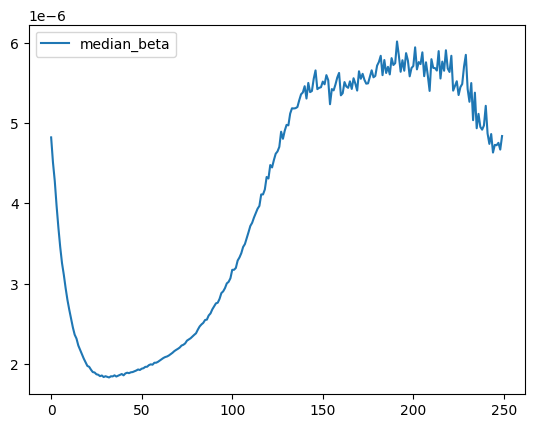

In [15]:
pd.read_csv('train/median_beta.csv', index_col=0).plot()

(-1e-07, 1e-05)

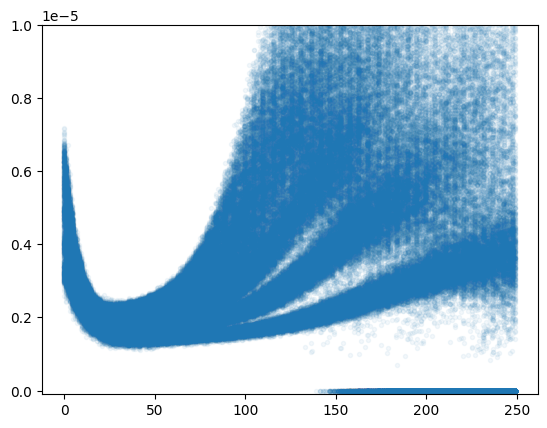

In [3]:
for i in np.arange(0,960):
    df = pd.read_csv(f'train/seir_seed_{i}.csv')
    plt.plot(df['Beta'].values, alpha=0.05, color = 'tab:blue', ls='', marker='.')
    
plt.ylim(-1e-7,1e-5)

In [6]:
import predict_Beta_I

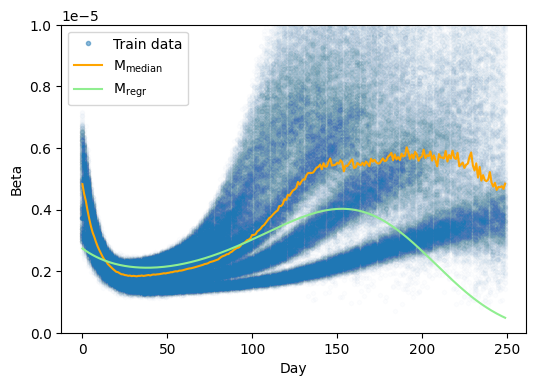

In [8]:
all_betas = pd.DataFrame()
for i in np.arange(960):
    df = pd.read_csv(f'train/seir_seed_{i}.csv')
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)


fig = plt.figure(figsize=(6, 4)) 
plt.plot(all_betas.iloc[0,0], marker='.', ls='',alpha=0.5,
        label='Train data')
plt.plot(all_betas[all_betas>0], marker='.', ls='',alpha=0.01,
        color='tab:blue');
plt.plot(all_betas[all_betas>0].median(axis=1), ls='-', color='orange', 
         label='$\mathregular{M_{median}}$')

sigma = 0.1
gamma = 0.08
beggining_beta, predicted_beta, predicted_I = predict_Beta_I.predict_beta(
                            'seir', df, 'regression (day)', 
                             np.arange(30, df.shape[0]), False, 0, sigma, gamma,
                             features_reg = ['day','prev_I','S','E','I','R'])

plt.plot(df.index.values, 
         np.concatenate((beggining_beta, predicted_beta)), ls='-', color='lightgreen', 
         label='$\mathregular{M_{regr}}$')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Beta')
plt.ylim(0,1e-5)
plt.legend()
plt.savefig(f'results/Beta_trajectories.pdf', 
            format='pdf',  bbox_inches='tight') 

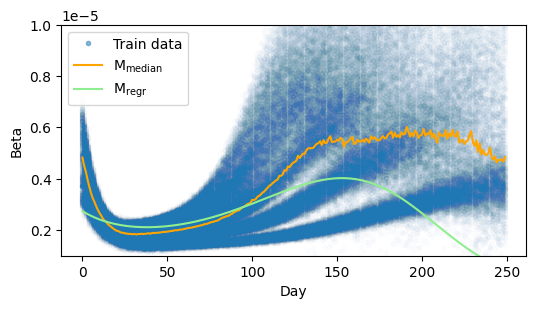

In [19]:
fig = plt.figure(figsize=(6, 3)) 
plt.plot(all_betas.iloc[0,0], marker='.', ls='',alpha=0.5,
        label='Train data')
plt.plot(all_betas[all_betas>0], marker='.', ls='',alpha=0.01,
        color='tab:blue');
plt.plot(all_betas[all_betas>0].median(axis=1), ls='-', color='orange', 
         label='$\mathregular{M_{median}}$')

plt.plot(df.index.values, 
         np.concatenate((beggining_beta, predicted_beta)), ls='-', color='lightgreen', 
         label='$\mathregular{M_{regr}}$')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Beta')
plt.ylim(1e-6,1e-5)

plt.legend()
plt.savefig(f'results/Beta_trajectories.png', 
            format='png',  bbox_inches='tight') 

Research of Infected values for every seed

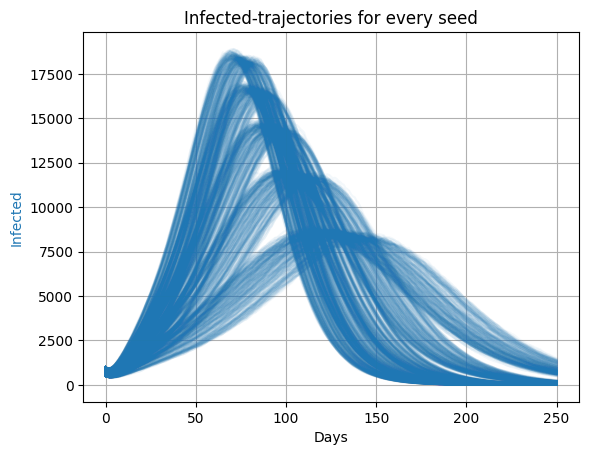

In [9]:
for i in np.arange(0,1500):
    df = pd.read_csv(f'initial_data/seir_seed_{i}.csv')
    plt.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
plt.xlabel('Days')
plt.ylabel('Infected', color='tab:blue')
plt.title('Infected-trajectories for every seed')
#plt.ylim([0,500])
plt.grid()
plt.show()



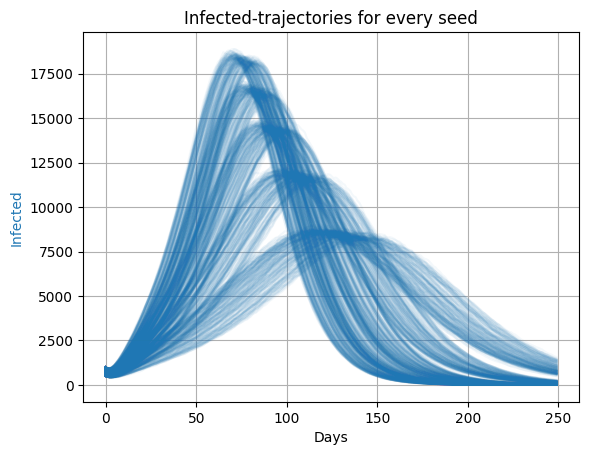

In [25]:
for i in np.arange(0,960):
    df = pd.read_csv(f'train/seir_seed_{i}.csv')
    plt.plot(df['I'].values, alpha=0.05, color = 'tab:blue')
plt.xlabel('Days')
plt.ylabel('Infected', color='tab:blue')
plt.title('Infected-trajectories for every seed')
#plt.ylim([0,500])
plt.grid()
plt.show()

